In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re # For regular expressions with Python

Read dataset

In [3]:
# Reading MIT-BIH Arrhythmia Dataset as an example
data_df = pd.read_csv('MIT-BIH Arrhythmia Database.csv') 
print(data_df.shape)
data_df.head()

(100689, 34)


,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,101,N,76,313.0,0.074347,-0.160548,1.036401,-0.285662,-0.026824,41,...,0.025930,2,18,22,2,0.025930,0.025930,0.025930,0.025436,0.025436
1,101,N,313,315.0,-0.052079,-0.264784,0.886597,-0.366298,-0.059710,21,...,-0.042009,26,27,62,9,-0.042009,-0.029498,0.005012,0.030892,0.002986
2,101,N,315,321.0,-0.062151,-0.296983,0.991859,-0.410306,-0.065686,22,...,0.009528,3,8,12,1,0.009528,0.009528,0.008786,0.008786,0.008368
3,101,N,321,336.0,-0.063322,-0.281386,1.034903,-0.403880,-0.071750,22,...,-0.020536,6,9,16,1,-0.020536,-0.020257,-0.018965,-0.016968,-0.014555
4,101,N,336,344.0,-0.062915,1.046914,1.046408,1.046408,-0.074639,11,...,0.016053,16,5,31,10,0.016053,0.006742,0.002782,-0.007798,-0.051155


In [4]:
qrs_morph_columns = [col for col in data_df.columns if re.search(r'\d+_qrs_morph\d+', col)]

data_df_no_morph = data_df.drop(columns=qrs_morph_columns)

In [5]:
data_df_no_morph.head()

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_post-RR,1_pPeak,1_tPeak,1_rPeak,1_sPeak,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval
0,101,N,76,313.0,0.074347,-0.160548,1.036401,-0.285662,-0.026824,41,...,313.0,0.038310,0.025784,0.025930,0.025271,0.025930,2,18,22,2
1,101,N,313,315.0,-0.052079,-0.264784,0.886597,-0.366298,-0.059710,21,...,315.0,0.014264,0.045458,0.032573,-0.104503,-0.042009,26,27,62,9
2,101,N,315,321.0,-0.062151,-0.296983,0.991859,-0.410306,-0.065686,22,...,321.0,0.021311,0.008246,0.009528,0.008230,0.009528,3,8,12,1
3,101,N,321,336.0,-0.063322,-0.281386,1.034903,-0.403880,-0.071750,22,...,336.0,-0.000665,-0.009725,-0.010203,-0.010203,-0.020536,6,9,16,1
4,101,N,336,344.0,-0.062915,1.046914,1.046408,1.046408,-0.074639,11,...,344.0,0.024559,0.016925,0.016053,-0.099918,0.016053,16,5,31,10


In [6]:
data_df_no_morph.dtypes

record              int64
type               object
0_pre-RR            int64
0_post-RR         float64
0_pPeak           float64
0_tPeak           float64
0_rPeak           float64
0_sPeak           float64
0_qPeak           float64
0_qrs_interval      int64
0_pq_interval       int64
0_qt_interval       int64
0_st_interval       int64
1_pre-RR            int64
1_post-RR         float64
1_pPeak           float64
1_tPeak           float64
1_rPeak           float64
1_sPeak           float64
1_qPeak           float64
1_qrs_interval      int64
1_pq_interval       int64
1_qt_interval       int64
1_st_interval       int64
dtype: object

Split the data into features and class labels

In [7]:
x_data = data_df_no_morph.iloc[:, 2:].copy()
y_label = data_df_no_morph[['type']].copy()

In [8]:
x_data.head()

,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,0_pq_interval,0_qt_interval,...,1_post-RR,1_pPeak,1_tPeak,1_rPeak,1_sPeak,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval
0,76,313.0,0.074347,-0.160548,1.036401,-0.285662,-0.026824,41,18,66,...,313.0,0.038310,0.025784,0.025930,0.025271,0.025930,2,18,22,2
1,313,315.0,-0.052079,-0.264784,0.886597,-0.366298,-0.059710,21,4,33,...,315.0,0.014264,0.045458,0.032573,-0.104503,-0.042009,26,27,62,9
2,315,321.0,-0.062151,-0.296983,0.991859,-0.410306,-0.065686,22,3,32,...,321.0,0.021311,0.008246,0.009528,0.008230,0.009528,3,8,12,1
3,321,336.0,-0.063322,-0.281386,1.034903,-0.403880,-0.071750,22,4,33,...,336.0,-0.000665,-0.009725,-0.010203,-0.010203,-0.020536,6,9,16,1
4,336,344.0,-0.062915,1.046914,1.046408,1.046408,-0.074639,11,4,16,...,344.0,0.024559,0.016925,0.016053,-0.099918,0.016053,16,5,31,10


In [9]:
y_label.value_counts()

type
N       90083
VEB      7009
SVEB     2779
F         803
Q          15
Name: count, dtype: int64

In [10]:
# Transform multi-class labels into binary-class (arrhythmia and normal)
y_label.replace(['VEB', 'SVEB', 'F', 'Q'], 'arrhythmia', inplace=True)
y_label.replace(['N'], 'normal', inplace=True)

#y_label.loc[y_label['type'].isin(['VEB', 'SVEB', 'F', 'Q']), 'type'] = 'arrhythmia'
#y_label.loc[y_label['type'] == 'N', 'type'] = 'normal'

In [11]:
y_label.value_counts()

type      
normal        90083
arrhythmia    10606
Name: count, dtype: int64

Train-test Split

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_label, random_state=101)

Feature Scaling

In [13]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

print(min_max_scaler.scale_)

[0.00047847 0.00047438 0.14497051 0.163272   0.15645161 0.13086489
 0.14384207 0.00588235 0.00671141 0.00303951 0.00714286 0.00047847
 0.00047438 0.13755979 0.10530541 0.12688961 0.10556911 0.10509129
 0.00456621 0.00543478 0.002457   0.00531915]


In [14]:
X_train_scaled

array([[0.15263158, 0.15512334, 0.44506625, ..., 0.04891304, 0.04176904,
        0.05319149],
       [0.08277512, 0.09250474, 0.45011298, ..., 0.01086957, 0.04914005,
        0.05851064],
       [0.13349282, 0.09250474, 0.45430416, ..., 0.10326087, 0.0982801 ,
        0.10106383],
       ...,
       [0.10813397, 0.10721063, 0.44058918, ..., 0.05978261, 0.07125307,
        0.        ],
       [0.22583732, 0.14848197, 0.44756388, ..., 0.01630435, 0.03931204,
        0.00531915],
       [0.13971292, 0.15227704, 0.47261668, ..., 0.02173913, 0.07616708,
        0.06382979]])

Model Training

In [15]:
from sklearn.ensemble import RandomForestClassifier

y_train_1d = y_train.values.ravel()  # Convertir a array 1D

model = RandomForestClassifier(random_state=101, n_estimators=150)
#model.fit(X_train_scaled, y_train) # Original
model.fit(X_train_scaled, y_train_1d)

# training accuracy
print('Accuracy for the train data', model.score(X_train_scaled, y_train))

Accuracy for the train data 1.0


# Second model for feature names

In [25]:
#Modelo pero con feature names
import pandas as pd2

X_df = pd2.DataFrame(X_train_scaled, columns=X_train.columns)

model2 = RandomForestClassifier(random_state=101, n_estimators=150)
model2.fit(X_df, y_train_1d)
model2.feature_names_in_ = X_train.columns

Model Testing

In [16]:
from sklearn import metrics
y_pred = model.predict(X_test_scaled)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("*** Confusion Matrix ***")
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.9900289993246733
*** Confusion Matrix ***
[[ 2388   193]
 [   58 22534]]


Intento de exportar en imagen

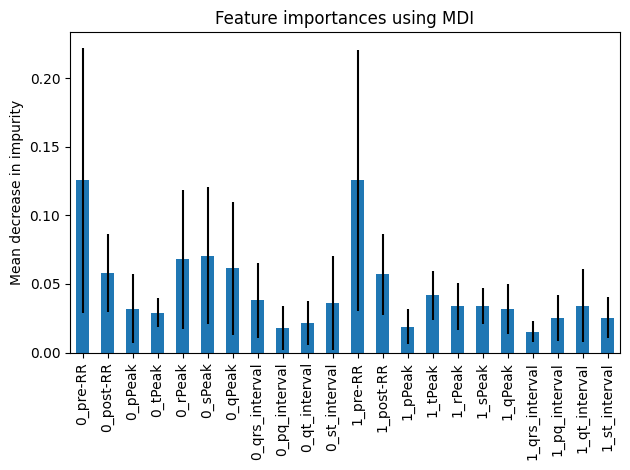

In [ ]:
import matplotlib.pyplot as plt
#from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

importances = model.feature_importances_
feature_names = X_train.columns  
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
 
forest_importances = pd.Series(importances, index=feature_names)
 
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

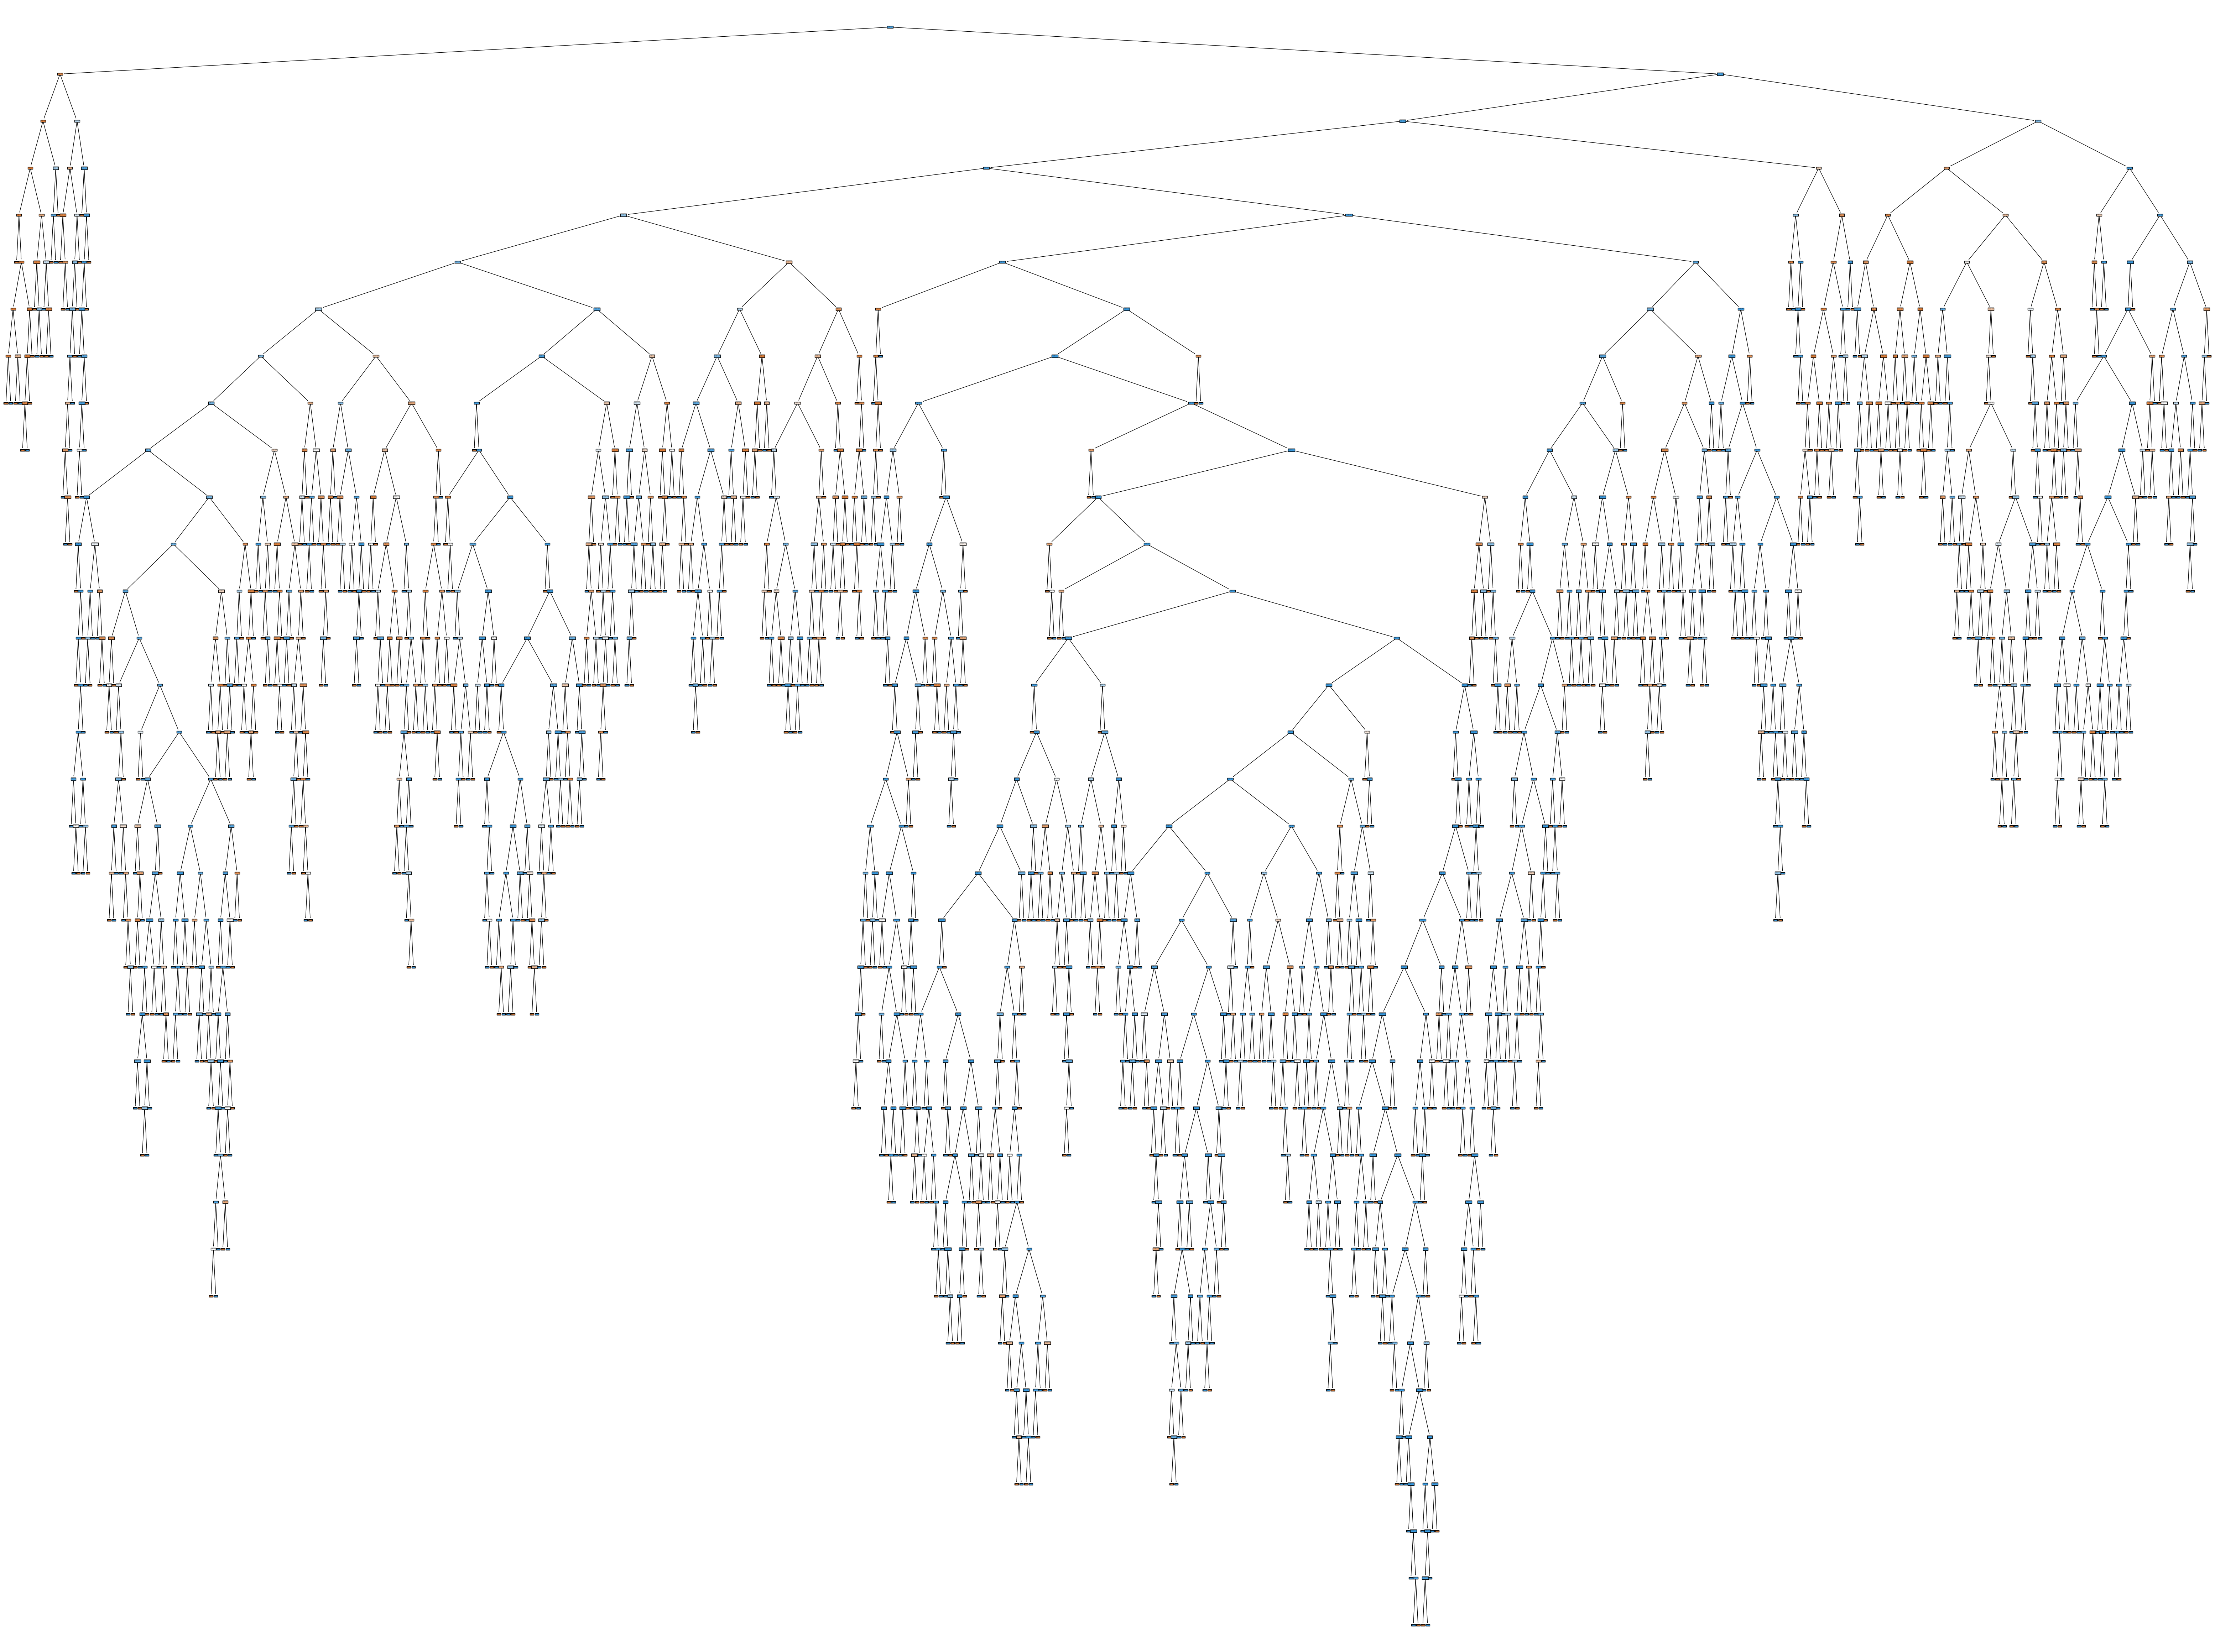

In [18]:
plt.figure(figsize=(80, 60))
plot_tree(model.estimators_[0], feature_names=feature_names, filled=True)  # Visualiza el primer árbol
plt.show()

In [ ]:
from treeinterpreter import treeinterpreter as ti
import numpy as np

prediction, bias, contributions = ti.predict(model, X_test_scaled)

instance_index = 0  # Índice de la instancia para la que se quieren las reglas
 
for i, feature in enumerate(X_test.columns):
    print(f"{feature}: {contributions[instance_index, i]}")

0_pre-RR: [-0.04202236  0.04202236]
0_post-RR: [-0.00501107  0.00501107]
0_pPeak: [ 8.47261991e-07 -8.47261991e-07]
0_tPeak: [ 0.00107542 -0.00107542]
0_rPeak: [ 0.01462927 -0.01462927]
0_sPeak: [-0.00763914  0.00763914]
0_qPeak: [-0.01104055  0.01104055]
0_qrs_interval: [-8.68530113e-05  8.68530113e-05]
0_pq_interval: [-0.00202357  0.00202357]
0_qt_interval: [-0.00303248  0.00303248]
0_st_interval: [-0.00311396  0.00311396]
1_pre-RR: [-0.03626067  0.03626067]
1_post-RR: [-0.00497426  0.00497426]
1_pPeak: [-0.00116997  0.00116997]
1_tPeak: [ 0.00130958 -0.00130958]
1_rPeak: [-0.00481236  0.00481236]
1_sPeak: [-0.00203792  0.00203792]
1_qPeak: [-0.00528265  0.00528265]
1_qrs_interval: [-0.00161363  0.00161363]
1_pq_interval: [ 0.00901049 -0.00901049]
1_qt_interval: [-0.00114774  0.00114774]
1_st_interval: [-0.00102424  0.00102424]


Export model

In [103]:
import joblib

# Save model in a file
joblib.dump((model, min_max_scaler), 'Nehemiah.pkl')

['Nehemiah.pkl']

Input feature scaling

In [99]:
new0 = [76,313,0.07434712,-0.160547951,1.036401408,-0.285662496,-0.026823649,41,18,66,7,76,313,0.038309507,0.025784325,0.025930319,0.02527078,0.025930319,2,18,22,2] # N
new1 = [313,315,-0.052078893,-0.264784292,0.886596913,-0.366297705,-0.059710405,21,4,33,8,313,315,0.014263639,0.045458043,0.032572702,-0.104502953,-0.042008529,26,27,62,9] # N
new2 = [151,439,0.463362235,0.519227559,0.399900123,-0.835039794,-0.206610994,47,39,171,85,151,439,-0.277927062,-0.273391493,-0.574060719,-0.597215122,-0.574060719,2,11,23,10] # VEB

new_2d = np.reshape(new2, (1, -1))
new_2d_scale = min_max_scaler.transform(new_2d)
new_2d_scale = new_2d_scale.flatten()
#new_2d_scale = new_2d_scale.reshape(1, -1)

prediccion0 = model.predict([new_2d_scale])

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [100]:
prediccion0

array(['arrhythmia'], dtype=object)

In [84]:
new_2d_scale

array([0.06076555, 0.20540797, 0.51576931, 0.41236779, 0.43379879,
       0.36478728, 0.52714496, 0.27647059, 0.25503356, 0.50455927,
       0.6       , 0.06076555, 0.20540797, 0.25177973, 0.2337888 ,
       0.41534152, 0.58671697, 0.5157798 , 0.00913242, 0.05434783,
       0.04422604, 0.04787234])

In [50]:
#import wfdb